In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
from os.path import isfile, join, getctime
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
PATH_MEAL_PHOTOS= '../data/photos_johan/'
PATH_GLUCOSE='../data/johan_glucose.csv'
PATH_GLUCOSEI='../data/glucose.csv'

In [4]:
def end_plot():
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def resize(l=8, w=6):
    plt.figure(num=None, figsize=(l, w), dpi=120, facecolor='w', edgecolor='k')
from datetime import timedelta as tdel
def shift_fwd(t, h=1, m=0):
    return t+ tdel(hours=h, minutes=m)
def shift_back(t, h=1, m=0):
    return t- tdel(hours=h, minutes=m)

In [5]:
def normalize(ser):
    return (ser - ser.mean()) / ser.std()

## Shift time by one hour first

In [6]:
def get_meals(photos_path, shift=True):
    if not(shift):
        raise Exception('NOT SHIFTING TIME?')
    files_ts = [
        # shift by one hour
    (shift_fwd(dt.fromtimestamp(os.stat(photos_path+f).st_mtime)), f) 
    for f in os.listdir(photos_path) if isfile(join(photos_path, f))]
    fs = [(f[0].day, f[0].hour, f[0].minute, f[0].hour*100+f[0].minute, "{}:{}".format(f[0].hour, f[0].minute), f[0], f[0], f[0].date(), f[1]) for f in files_ts]
    return pd.DataFrame(fs, columns=['day', 'hour', 'minute', 'time_fmt','time_str', 'idx','ctime', 'cdate', 'filename'])

def get_indexed_meals(photos_path, idx):
    df = get_meals(photos_path)
    return df.set_index([idx])

In [7]:
meals = get_indexed_meals(PATH_MEAL_PHOTOS, 'idx')
meals

,day,hour,minute,time_fmt,time_str,ctime,cdate,filename
idx,,,,,,,,
2020-10-03 16:50:36,3,16,50,1650,16:50,2020-10-03 16:50:36,2020-10-03,IMG_0387.jpg
2020-10-03 23:05:18,3,23,5,2305,23:5,2020-10-03 23:05:18,2020-10-03,IMG_0389.jpg
2020-10-04 09:47:14,4,9,47,947,9:47,2020-10-04 09:47:14,2020-10-04,IMG_0390.jpg
2020-10-04 15:04:58,4,15,4,1504,15:4,2020-10-04 15:04:58,2020-10-04,IMG_0391.jpg
2020-10-04 16:45:54,4,16,45,1645,16:45,2020-10-04 16:45:54,2020-10-04,IMG_0392.jpg
2020-10-04 20:56:54,4,20,56,2056,20:56,2020-10-04 20:56:54,2020-10-04,IMG_0396.jpg
2020-10-05 12:14:56,5,12,14,1214,12:14,2020-10-05 12:14:56,2020-10-05,IMG_0401.jpg
2020-10-05 19:06:26,5,19,6,1906,19:6,2020-10-05 19:06:26,2020-10-05,IMG_0404.jpg
2020-10-05 19:49:58,5,19,49,1949,19:49,2020-10-05 19:49:58,2020-10-05,IMG_0406.jpg


# Show meal time distribution

In [8]:
m_gday = meals.groupby('cdate')

/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


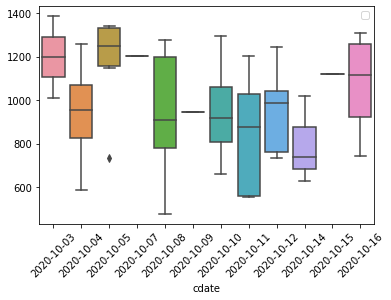

In [9]:
sns.boxplot(meals.cdate, meals.hour*60+meals.minute)
end_plot()

No handles with labels found to put in legend.


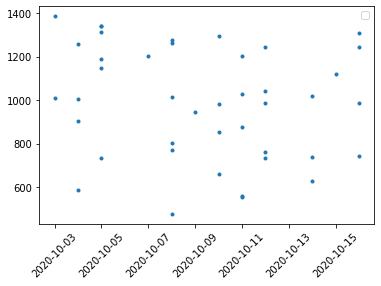

In [10]:
plt.plot(meals.cdate, meals.hour*60+meals.minute, linestyle='none', marker='.')
end_plot()

In [255]:
#def get_daily_meals(mdf):
gday =meals.groupby('cdate')

dateless = lambda x: x.hour*60+x.minute

In [256]:
mgdf = gday.count()
mgdf['cnt']= mgdf.ctime
mgdf['firstm']=gday['ctime'].min()
mgdf['lastm']=gday['ctime'].max()
mgdf['ftol']=(mgdf['lastm']-mgdf['firstm']).astype('timedelta64[h]')
mgdf['ftol']

cdate
2020-10-03     6.0
2020-10-04    11.0
2020-10-05    10.0
2020-10-07     0.0
2020-10-08    13.0
2020-10-09     0.0
2020-10-10    10.0
2020-10-11    10.0
2020-10-12     8.0
2020-10-14     6.0
2020-10-15     0.0
2020-10-16     9.0
Name: ftol, dtype: float64

In [257]:
mgdf

,day,hour,minute,time_fmt,time_str,ctime,filename,cnt,firstm,lastm,ftol
cdate,,,,,,,,,,,
2020-10-03,2,2,2,2,2,2,2,2,2020-10-03 16:50:36,2020-10-03 23:05:18,6.0
2020-10-04,4,4,4,4,4,4,4,4,2020-10-04 09:47:14,2020-10-04 20:56:54,11.0
2020-10-05,6,6,6,6,6,6,6,6,2020-10-05 12:14:56,2020-10-05 22:20:10,10.0
2020-10-07,1,1,1,1,1,1,1,1,2020-10-07 20:04:50,2020-10-07 20:04:50,0.0
2020-10-08,6,6,6,6,6,6,6,6,2020-10-08 07:57:48,2020-10-08 21:14:22,13.0
2020-10-09,1,1,1,1,1,1,1,1,2020-10-09 15:45:28,2020-10-09 15:45:28,0.0
2020-10-10,4,4,4,4,4,4,4,4,2020-10-10 10:59:04,2020-10-10 21:34:22,10.0
2020-10-11,5,5,5,5,5,5,5,5,2020-10-11 09:17:54,2020-10-11 20:01:02,10.0
2020-10-12,5,5,5,5,5,5,5,5,2020-10-12 12:14:34,2020-10-12 20:43:28,8.0


No handles with labels found to put in legend.


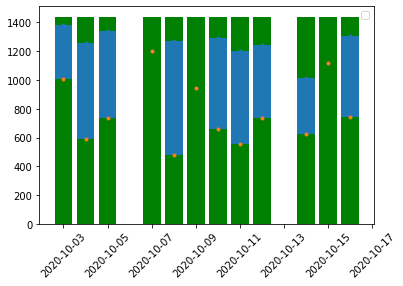

No handles with labels found to put in legend.


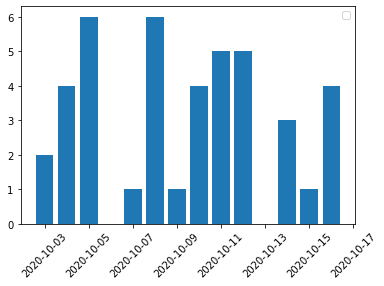

No handles with labels found to put in legend.


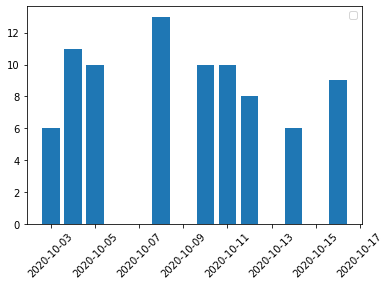

In [258]:
plt.bar(mgdf.index, mgdf.firstm.map(lambda x: 24*60), color='green')
plt.bar(mgdf.index, mgdf.lastm.map(dateless))
plt.plot(mgdf.index, mgdf.lastm.map(dateless), linestyle='none', marker='.')
plt.plot(mgdf.index, mgdf.firstm.map(dateless), linestyle='none', marker='.')
plt.bar(mgdf.index, mgdf.firstm.map(dateless), color='green')
end_plot()
plt.bar(mgdf.index, mgdf.cnt)
end_plot()
plt.bar(mgdf.index, mgdf.ftol)
end_plot()


# Select days with enough data only

,day,hour,minute,time_fmt,time_str,ctime,cdate,filename,HD
idx,,,,,,,,,
2020-10-04 07:47:14,4,7,47,747,7:47,2020-10-04 07:47:14,2020-10-04,IMG_0390.jpg,True
2020-10-04 13:04:58,4,13,4,1304,13:4,2020-10-04 13:04:58,2020-10-04,IMG_0391.jpg,True
2020-10-04 14:45:54,4,14,45,1445,14:45,2020-10-04 14:45:54,2020-10-04,IMG_0392.jpg,True
2020-10-04 18:56:54,4,18,56,1856,18:56,2020-10-04 18:56:54,2020-10-04,IMG_0396.jpg,True


[datetime.date(2020, 10, 4),
 datetime.date(2020, 10, 5),
 datetime.date(2020, 10, 8),
 datetime.date(2020, 10, 10),
 datetime.date(2020, 10, 11),
 datetime.date(2020, 10, 12),
 datetime.date(2020, 10, 16)]

In [14]:
high_days=list(mgdf[mgdf.cnt>=4].index)

In [15]:
# get meals in high days
meals['HD']=meals.index.map(lambda x: x.date() in high_days)
imeals = meals[meals.HD]

No handles with labels found to put in legend.


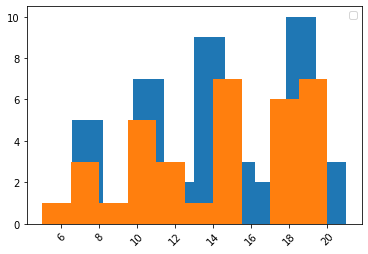

In [16]:
plt.hist(meals.hour, bins=10)
plt.hist(imeals.hour, bins=10)
end_plot()

In [17]:
imeals.ctime.max()

Timestamp('2020-10-16 19:49:56')

No handles with labels found to put in legend.


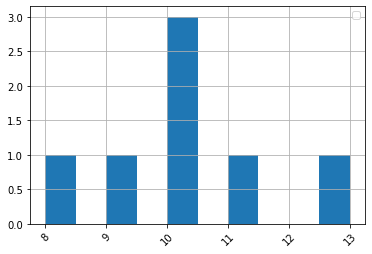

No handles with labels found to put in legend.


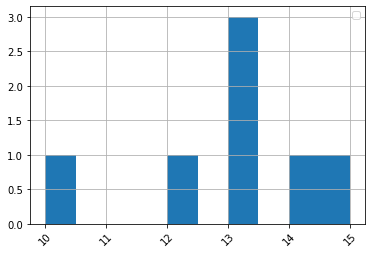

In [18]:
igday = imeals.groupby('cdate')
imgdf = igday.count()
imgdf['cnt']= mgdf.ctime
imgdf['firstm']=igday['ctime'].min()
imgdf['lastm']=igday['ctime'].max()
imgdf['ftol']=(imgdf['lastm']-imgdf['firstm']).astype('timedelta64[h]')
imgdf['ftol']
imgdf.ftol.hist()
end_plot()

imgdf.ftol.map(lambda x: 23-x).hist()
end_plot()

<BarContainer object of 7 artists>

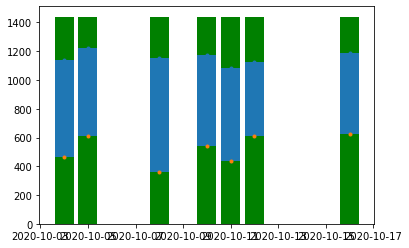

In [25]:
plt.bar(imgdf.index, imgdf.firstm.map(lambda x: 24*60), color='green')
plt.bar(imgdf.index, imgdf.lastm.map(dateless))
plt.plot(imgdf.index, imgdf.lastm.map(dateless), linestyle='none', marker='.')
plt.plot(imgdf.index, imgdf.firstm.map(dateless), linestyle='none', marker='.')
plt.bar(imgdf.index, imgdf.firstm.map(dateless), color='green')

# Get glucose

array([datetime.date(2020, 10, 3), datetime.date(2020, 10, 3),
       datetime.date(2020, 10, 3), ..., datetime.date(2020, 10, 14),
       datetime.date(2020, 10, 15), datetime.date(2020, 10, 15)],
      dtype=object)

In [81]:
glucose = pd.read_csv(PATH_GLUCOSE, skiprows=1)
glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')
assert sum(glucose.dtime.isna()) == 0
glucose.set_index(t_, inplace=True)

glucose['t_']=glucose.index
glucose['date']=glucose.index.date
glucose['day']=glucose.index.day
glucose['dayofweek']=glucose.index.weekday
glucose['hour']=glucose.index.hour
glucose['minute']=glucose.index.minute
glucose['tminutes']=glucose.minute+60*glucose.hour
glucose['ftime']=glucose.minute+100*glucose.hour
glucose['strtime']=glucose.hour.map(lambda x: "{}:".format(x))+glucose.minute.astype(str)
glucose

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,User Change Insulin (units),t_,date,day,dayofweek,hour,minute,tminutes,ftime,strtime
dtime,,,,,,,,,,,,,,,,,,,,,
2020-10-03 14:38:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:38,0,6.1,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-03 14:38:00,2020-10-03,3,5,14,38,878,1438,14:38
2020-10-03 14:53:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:53,0,5.8,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-03 14:53:00,2020-10-03,3,5,14,53,893,1453,14:53
2020-10-03 15:08:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 15:08,0,5.7,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-03 15:08:00,2020-10-03,3,5,15,8,908,1508,15:8
2020-10-03 15:23:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 15:23,0,5.7,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-03 15:23:00,2020-10-03,3,5,15,23,923,1523,15:23
2020-10-03 15:38:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 15:38,0,5.7,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-03 15:38:00,2020-10-03,3,5,15,38,938,1538,15:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-10 06:30:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,10-10-2020 06:30,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-10 06:30:00,2020-10-10,10,5,6,30,390,630,6:30
2020-10-11 12:16:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,11-10-2020 12:16,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-11 12:16:00,2020-10-11,11,6,12,16,736,1216,12:16
2020-10-14 17:36:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,14-10-2020 17:36,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-10-14 17:36:00,2020-10-14,14,2,17,36,1056,1736,17:36


In [82]:
weekday_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [83]:
is_weekend  = lambda x: True if x%7>4 else False

In [84]:
glucose['weekend']=glucose['dayofweek'].map(is_weekend)

/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weekend', ylabel='Historic Glucose mmol/L'>

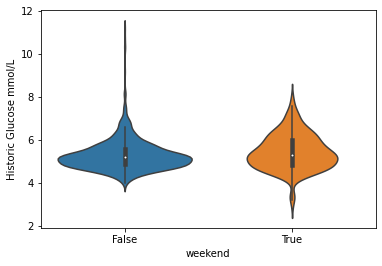

In [85]:
sns.violinplot(glucose.weekend, glucose[glbl])

In [36]:
g_weekday = glucose[glucose.weekend== False]
g_weekend = glucose[glucose.weekend]

No handles with labels found to put in legend.


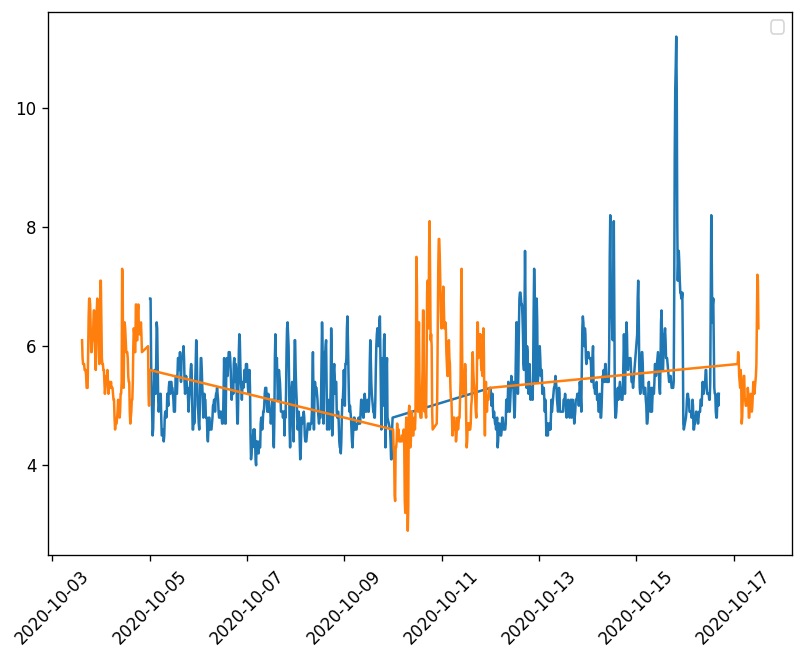

In [37]:
resize()
plt.plot(g_weekday[glbl])
plt.plot(g_weekend[glbl])
end_plot()

In [86]:
GLU=glucose.copy()

In [103]:
len(glucose)

1450

In [112]:

glucose[glbl] = GLU[glbl]

In [123]:
glucose[glucose.weekend==False][glbl].dropna()

dtime
2020-10-05 00:11:00    6.8
2020-10-05 00:26:00    6.8
2020-10-05 00:41:00    5.8
2020-10-05 00:56:00    5.2
2020-10-05 01:11:00    4.9
                      ... 
2020-10-16 15:43:00    4.8
2020-10-16 15:58:00    5.1
2020-10-16 16:13:00    5.2
2020-10-16 16:28:00    5.0
2020-10-16 16:43:00    5.2
Name: Historic Glucose mmol/L, Length: 916, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1245b2f50>,
 'caps': [<matplotlib.lines.Line2D at 0x121dacdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x122912dd0>,
 'medians': [<matplotlib.lines.Line2D at 0x1232194d0>,
 'fliers': [],
 'means': []}

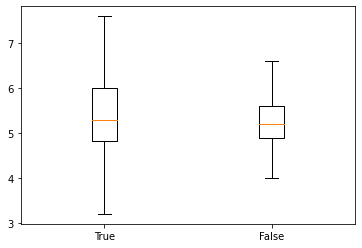

In [137]:

all_vals=glucose['weekend'].unique()
plt.boxplot([glucose[glucose['weekend'] == i][glbl].dropna() for i in all_vals], labels=all_vals,
                showfliers=False)

In [129]:
all_vals

array([ True, False])

No handles with labels found to put in legend.


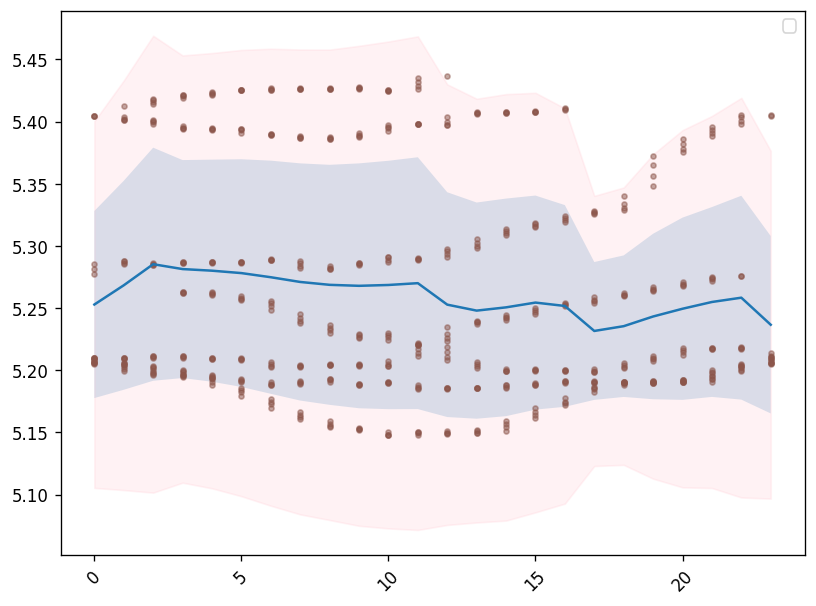

In [107]:

x = glucose.hour
y = glucose[glbl]


# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = glucose.groupby(['hour'])[glbl].mean()
y_err = glucose.groupby(['hour'])[glbl].std()

#fig, ax = plt.subplots()
resize()
#plt.plot(x, y, '.', color='tab:brown', alpha=0.5)
plt.plot(y_est.index, y_est, '-')

plt.fill_between(y_est.index, y_est - y_err, y_est + y_err, alpha=0.2)
plt.fill_between(y_est.index, y_est - 1.96*y_err, y_est + 1.96*y_err, alpha=0.2, color='pink')


end_plot()

In [49]:
glucose.groupby(['hour']).index

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [48]:
glucose.groupby(['hour'])[glbl].mean()

hour
0     5.520000
1     5.313208
2     5.141071
3     5.051786
4     4.825000
5     4.744643
6     4.753571
7     4.821818
8     5.103571
9     5.223214
10    5.344643
11    5.478571
12    5.566038
13    5.442308
14    5.500000
15    5.501786
16    5.452727
17    5.713462
18    5.757692
19    5.984000
20    5.760000
21    5.527273
22    5.706667
23    5.591304
Name: Historic Glucose mmol/L, dtype: float64

In [432]:
glucose = pd.read_csv(PATH_GLUCOSEI)#, skiprows=1)

glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')
assert sum(glucose.dtime.isna()) == 0
glucose.set_index(t_, inplace=True)

glucose['t_']=glucose.index
glucose['date']=glucose.index.date
glucose['day']=glucose.index.day
glucose['dayofweek']=glucose.index.weekday
glucose['hour']=glucose.index.hour
glucose['minute']=glucose.index.minute
glucose['tminutes']=glucose.minute+60*glucose.hour
glucose['ftime']=glucose.minute+100*glucose.hour
glucose['strtime']=glucose.hour.map(lambda x: "{}:".format(x))+glucose.minute.astype(str)
glucosei = glucose


# Analyze peaks

In [473]:
def get_integral(D, lb, tlbl):
    return sum((D[tlbl].diff() * D[lb]).dropna())

In [420]:
def derive(recv):
    return recv.diff()/recv.index.to_series().diff().dt.total_seconds()

def altderive(recv):
    return recv.diff()/recv.index.to_series().diff()

x    0.783327
Name: 0.9, dtype: float64
x    0.041581
Name: 3.1, dtype: float64


/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


t
0.9    0.659708
1.0         NaN
1.1         NaN
1.2         NaN
1.3         NaN
1.4         NaN
1.5         NaN
1.6         NaN
1.7         NaN
1.8         NaN
1.9         NaN
2.0         NaN
2.1         NaN
2.2         NaN
2.3         NaN
2.4         NaN
2.5         NaN
2.6         NaN
2.7         NaN
2.8         NaN
2.9         NaN
3.0         NaN
3.1   -0.995393
dtype: float64

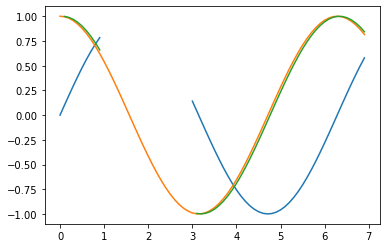

In [421]:
# verify derivative
from math import sin, cos
f = pd.DataFrame([{'t':1.*i/10, 'x':sin(1.*i/10)} for i in range(70)])
g = pd.DataFrame([{'t':1.*i/10, 'x':cos(1.*i/10)} for i in range(70)])
f.iloc[10:30]['x']=np.nan
f.set_index('t', inplace=True)
g.set_index('t', inplace=True)
df = altderive(f['x'])

plt.plot(f.x)
plt.plot(g.x)
plt.plot(df)
print(f.iloc[9])
print(f.iloc[31])
df.iloc[9:32]

In [422]:
def time_diff(recv): 
    return recv.index.to_series().diff().dt.total_seconds()

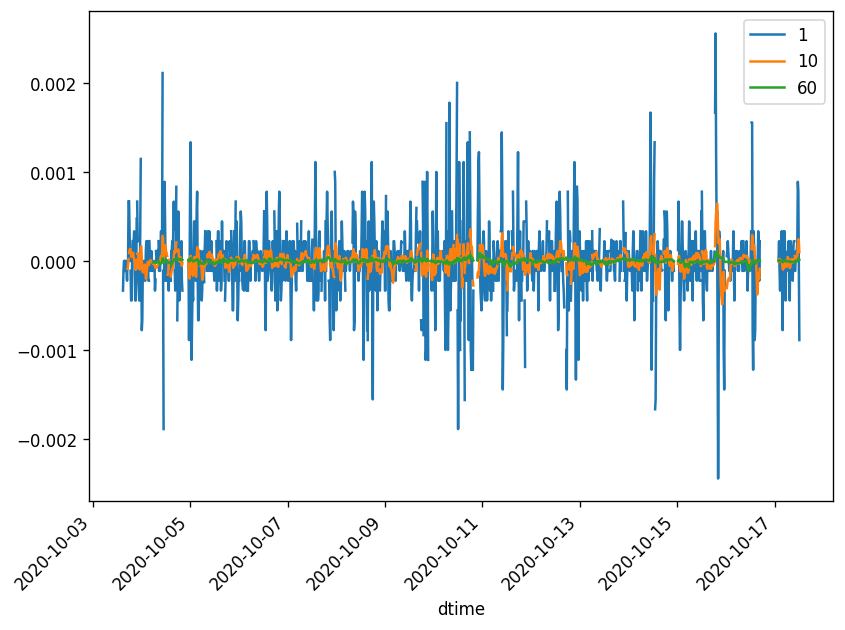

In [438]:
dgdt=derive(glucose[glbl])
glucose['dg/dt']=dgdt
resize()
for i in [1, 10, 60]:
    dgdt.rolling(i).mean().plot(label=i)
end_plot()

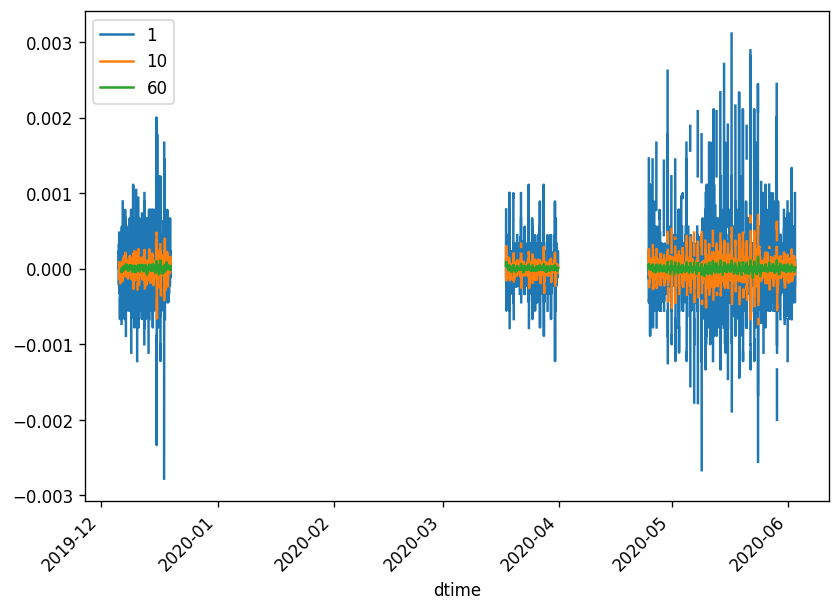

In [436]:
dgdti=derive(glucosei[glbl])
glucosei['dg/dt']=dgdti
resize()
for i in [1, 10, 60]:
    dgdti.rolling(i).mean().plot(label=i)
end_plot()

In [437]:
glucosei['dg/dt']

dtime
2019-12-05 16:25:00         NaN
2019-12-05 16:41:00    0.000104
2019-12-05 16:56:00    0.000111
2019-12-05 17:11:00    0.000222
2019-12-05 17:26:00    0.000222
                         ...   
2020-06-01 09:34:00         NaN
2020-06-01 09:34:00         NaN
2020-06-01 16:40:00         NaN
2020-06-01 22:15:00         NaN
2020-06-02 13:24:00         NaN
Name: dg/dt, Length: 7723, dtype: float64

No handles with labels found to put in legend.


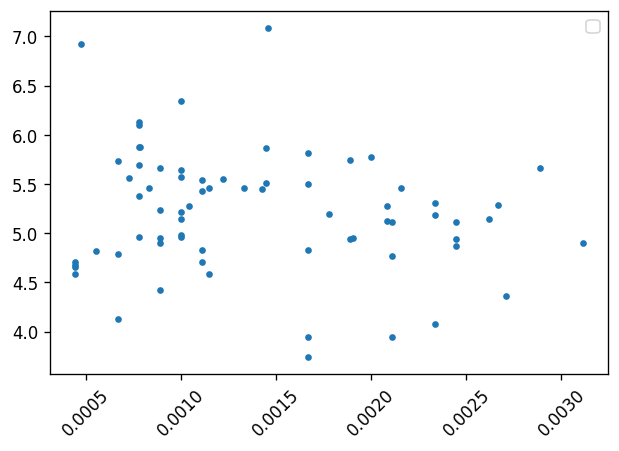

No handles with labels found to put in legend.


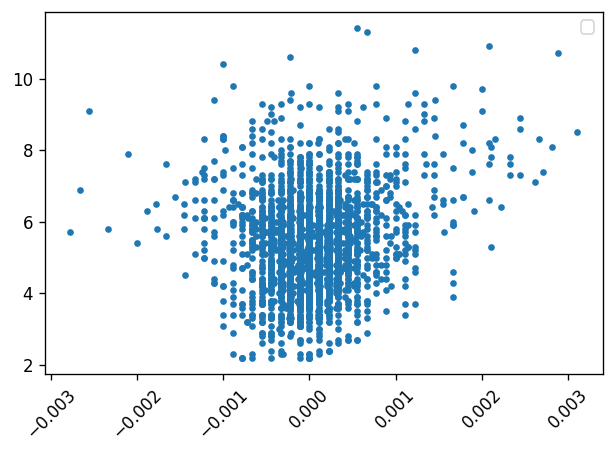

In [424]:
GR = glucose.groupby(['date'])
max_deriv_day = GR['dg/dt'].max()
max_deriv_dayN =normalize(GR['dg/dt'].max())
mean_gl_day = GR[glbl].mean()
mean_gl_dayN = normalize(GR[glbl].mean())
resize(6,4)
plt.plot(max_deriv_day, mean_gl_day, linestyle='none', marker='.')
end_plot()

resize(6,4)
plt.plot(glucose['dg/dt'], glucose[glbl], linestyle='none', marker='.')
end_plot()


No handles with labels found to put in legend.


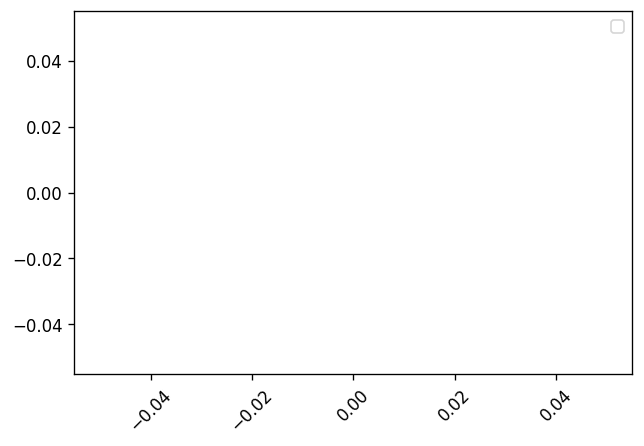

In [425]:

# day var

resize(6,4)
dday=glucose.loc[high_days[0].strftime("%Y-%m-%d")]
plt.plot(dday['dg/dt'], dday[glbl])
dday=glucose.loc[high_days[-1].strftime("%Y-%m-%d")]
plt.plot(dday['dg/dt'], dday[glbl])
end_plot()



/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


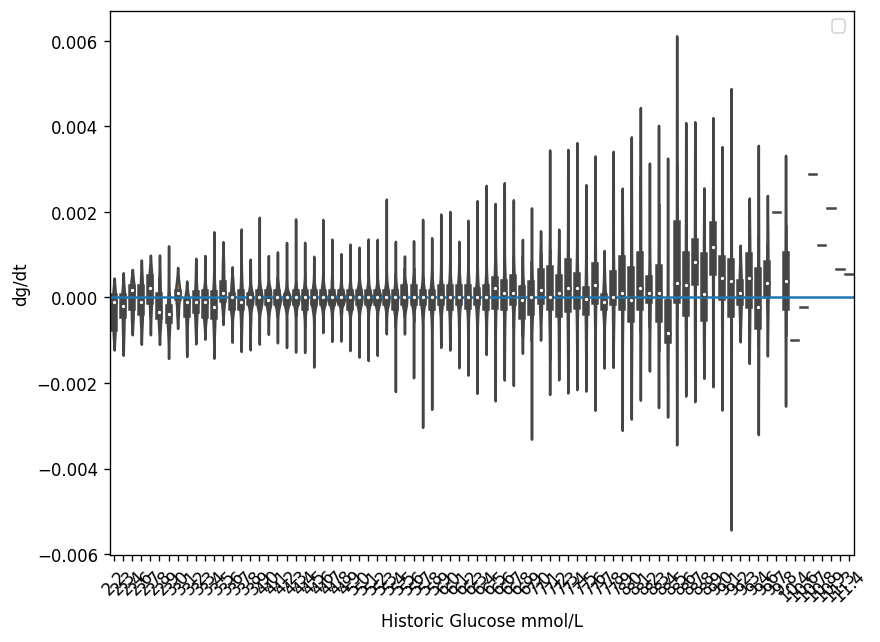

<Figure size 960x720 with 0 Axes>

In [426]:
resize()
dd = glucose
sns.violinplot(dd[glbl],dd['dg/dt'])
plt.axhline(y=0)
end_plot()
resize()

### NOTE
Insight: must keep glucose beyond 7.2 otherwise the derivative trends in the high range

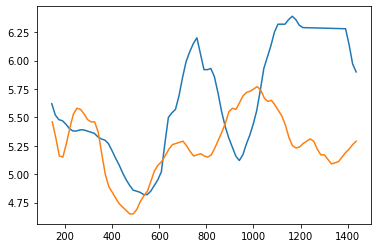

In [215]:
day=high_days[0].strftime("%Y-%m-%d")
day1=high_days[1].strftime("%Y-%m-%d")

dday=glucose.loc[day]
dday1=glucose.loc[day1]
plt.plot(dday['tminutes'], dday[glbl].rolling(10).mean())
plt.plot(dday1['tminutes'], dday1[glbl].rolling(10).mean())

In [199]:
dglbl='dg/dt'

In [234]:
LIMIT = dday[dglbl].mean()+dday[dglbl].std()
LLOW = dday[dglbl].mean()-dday[dglbl].std()
LIMIT1 = dday1[dglbl].mean()+dday1[dglbl].std()
LLOW1 = dday1[dglbl].mean()-dday1[dglbl].std()

No handles with labels found to put in legend.


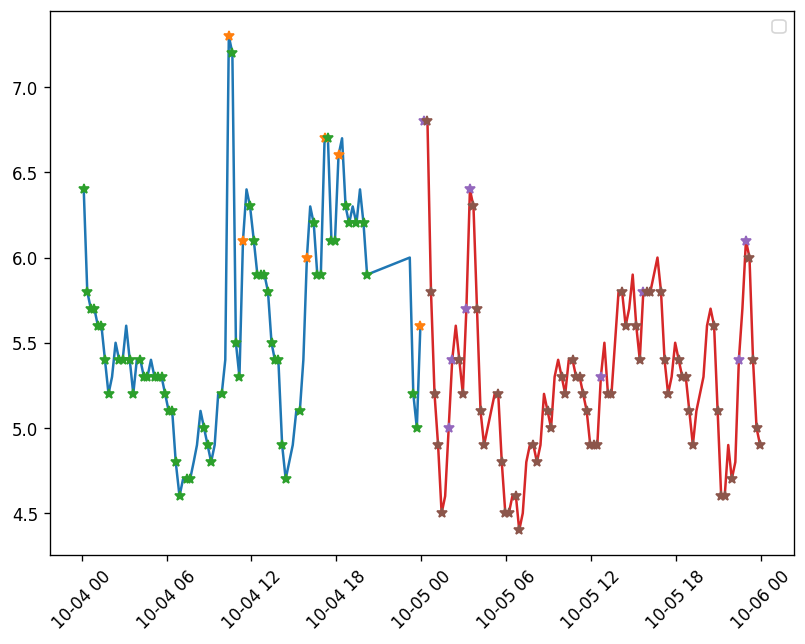

Peaks day 0, lim 0.00040978250887449606 : 6
Peaks day 1, lim 0.0003343065536191762 : 9


In [233]:
resize()

df=dday
plt.plot(df[glbl])
plt.plot(df[df[dglbl]>=LIMIT][glbl], linestyle='none', marker='*')
plt.plot(df[df[dglbl]<=0][glbl], linestyle='none', marker='*')

df=dday1
plt.plot(df[glbl])
plt.plot(df[df[dglbl]>=LIMIT1][glbl], linestyle='none', marker='*')
plt.plot(df[df[dglbl]<=0][glbl], linestyle='none', marker='*')

end_plot()

print("Peaks day 0, lim {} : {}".format(LIMIT, dday[dday[dglbl]>=LIMIT][glbl].count()))
print("Peaks day 1, lim {} : {}".format(LIMIT1, dday1[dday1[dglbl]>=LIMIT1][glbl].count()))

No handles with labels found to put in legend.


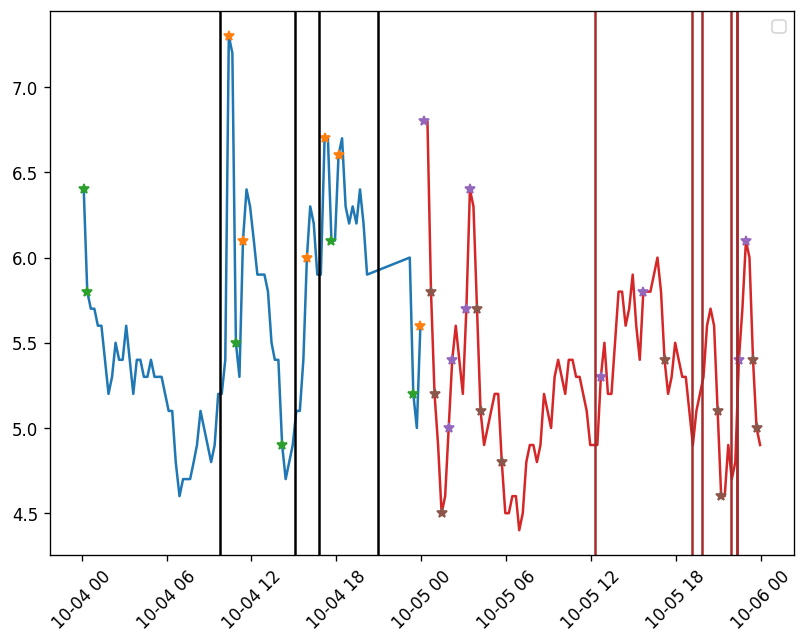

Peaks day 0, lim 0.00040978250887449606 : 6
Peaks day 1, lim 0.0003343065536191762 : 9


In [260]:
resize()

df=dday
plt.plot(df[glbl])
plt.plot(df[df[dglbl]>=LIMIT][glbl], linestyle='none', marker='*')
plt.plot(df[df[dglbl]<=LLOW][glbl], linestyle='none', marker='*')

df=dday1
plt.plot(df[glbl])
plt.plot(df[df[dglbl]>=LIMIT1][glbl], linestyle='none', marker='*')
plt.plot(df[df[dglbl]<=LLOW1][glbl], linestyle='none', marker='*')
for i in meals[day].index:
    plt.axvline(x=i, color='black')
for i in meals[day1].index:
    plt.axvline(x=i, color='brown')
end_plot()

print("Peaks day 0, lim {} : {}".format(LIMIT, dday[dday[dglbl]>=LIMIT][glbl].count()))
print("Peaks day 1, lim {} : {}".format(LIMIT1, dday1[dday1[dglbl]>=LIMIT1][glbl].count()))

**day 1 seems better**

In [219]:
meals[day]

,day,hour,minute,time_fmt,time_str,ctime,cdate,filename,HD
idx,,,,,,,,,
2020-10-04 07:47:14,4,7,47,747,7:47,2020-10-04 07:47:14,2020-10-04,IMG_0390.jpg,True
2020-10-04 13:04:58,4,13,4,1304,13:4,2020-10-04 13:04:58,2020-10-04,IMG_0391.jpg,True
2020-10-04 14:45:54,4,14,45,1445,14:45,2020-10-04 14:45:54,2020-10-04,IMG_0392.jpg,True
2020-10-04 18:56:54,4,18,56,1856,18:56,2020-10-04 18:56:54,2020-10-04,IMG_0396.jpg,True


In [220]:
meals[day1]

,day,hour,minute,time_fmt,time_str,ctime,cdate,filename,HD
idx,,,,,,,,,
2020-10-05 10:14:56,5,10,14,1014,10:14,2020-10-05 10:14:56,2020-10-05,IMG_0401.jpg,True
2020-10-05 17:06:26,5,17,6,1706,17:6,2020-10-05 17:06:26,2020-10-05,IMG_0404.jpg,True
2020-10-05 17:49:58,5,17,49,1749,17:49,2020-10-05 17:49:58,2020-10-05,IMG_0406.jpg,True
2020-10-05 19:51:54,5,19,51,1951,19:51,2020-10-05 19:51:54,2020-10-05,IMG_0409.jpg,True
2020-10-05 20:19:44,5,20,19,2019,20:19,2020-10-05 20:19:44,2020-10-05,IMG_0412.jpg,True
2020-10-05 20:20:10,5,20,20,2020,20:20,2020-10-05 20:20:10,2020-10-05,IMG_0413.jpg,True


No handles with labels found to put in legend.


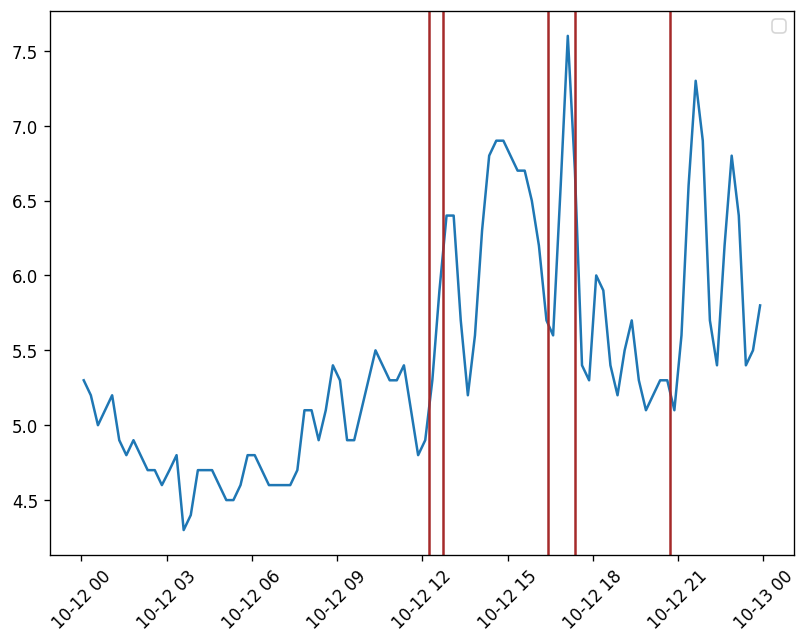

In [264]:
resize()
D='2020-10-12'
plt.plot(glucose.loc[D][glbl])

for i in meals[D].index:
    plt.axvline(x=i, color='brown')
end_plot()

# use derivative to find peaks

No handles with labels found to put in legend.


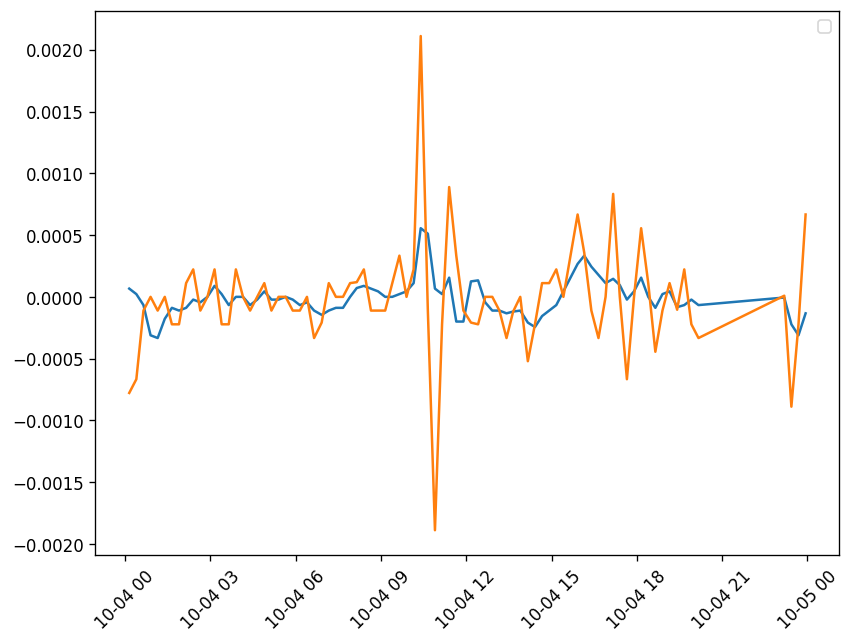

In [326]:
glucose['_0_']=glucose[dglbl].map(lambda x: 0 if x==0 else x/abs(x))

R=5
GRL = glucose.rolling(R)
gROLL = GRL[glbl].mean()
dgROLL = derive(gROLL)
resize()
plt.plot(dgROLL[day])
plt.plot(dgdt[day])
end_plot()

No handles with labels found to put in legend.


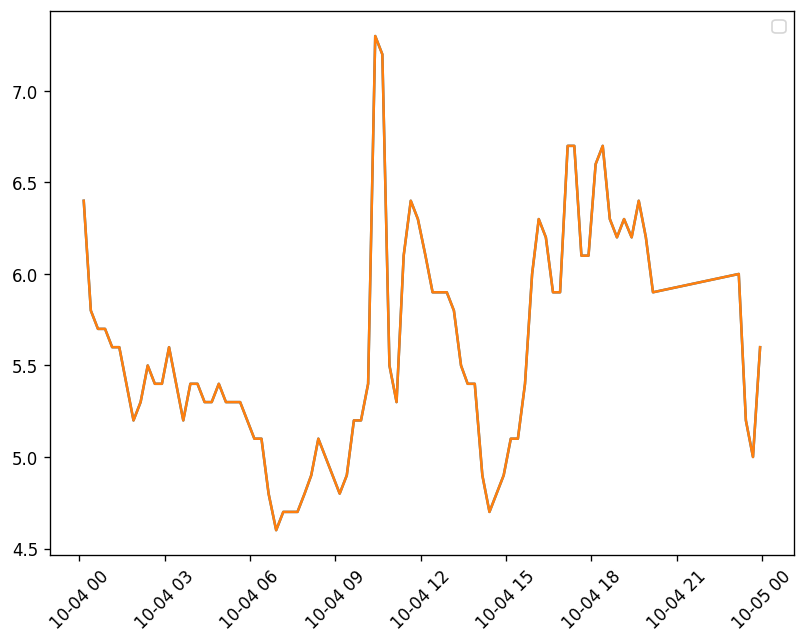

In [360]:
resize()
plt.plot(glucose.loc[day]['cleangl'])
plt.plot(glucose.loc[day][glbl])
end_plot()

No handles with labels found to put in legend.


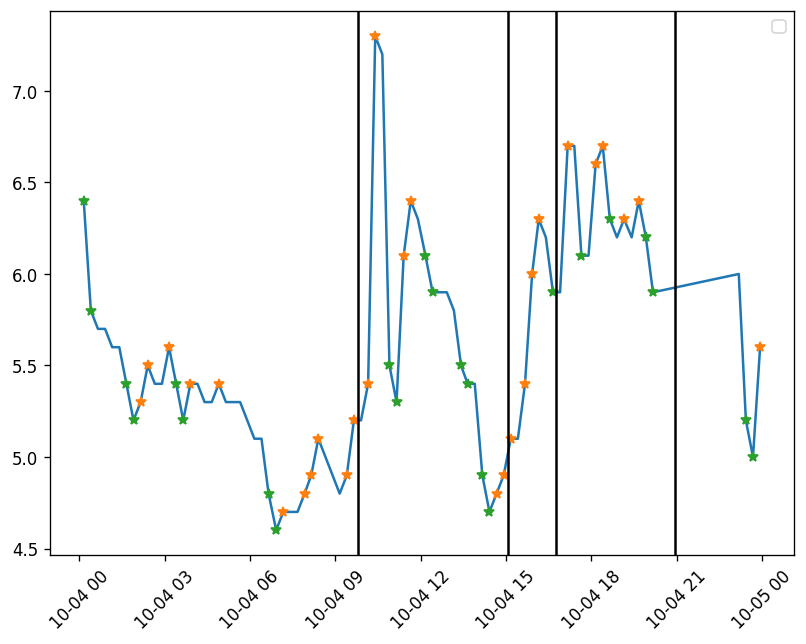

Peaks day 0, lim 0.00040978250887449606 : 6
Peaks day 1, lim 0.0003343065536191762 : 9


In [355]:
resize()
LIMIT = dday[dglbl].mean()+dday[dglbl].std()
LLOW = dday[dglbl].mean()-dday[dglbl].std()
df=dday
plt.plot(df[glbl])
plt.plot(df[df[dglbl]>=LIMIT/4][glbl], linestyle='none', marker='*')
plt.plot(df[df[dglbl]<=LLOW/4][glbl], linestyle='none', marker='*')

for i in meals[day].index:
    plt.axvline(x=i, color='black')
end_plot()

print("Peaks day 0, lim {} : {}".format(LIMIT, dday[dday[dglbl]>=LIMIT][glbl].count()))
print("Peaks day 1, lim {} : {}".format(LIMIT1, dday1[dday1[dglbl]>=LIMIT1][glbl].count()))

/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


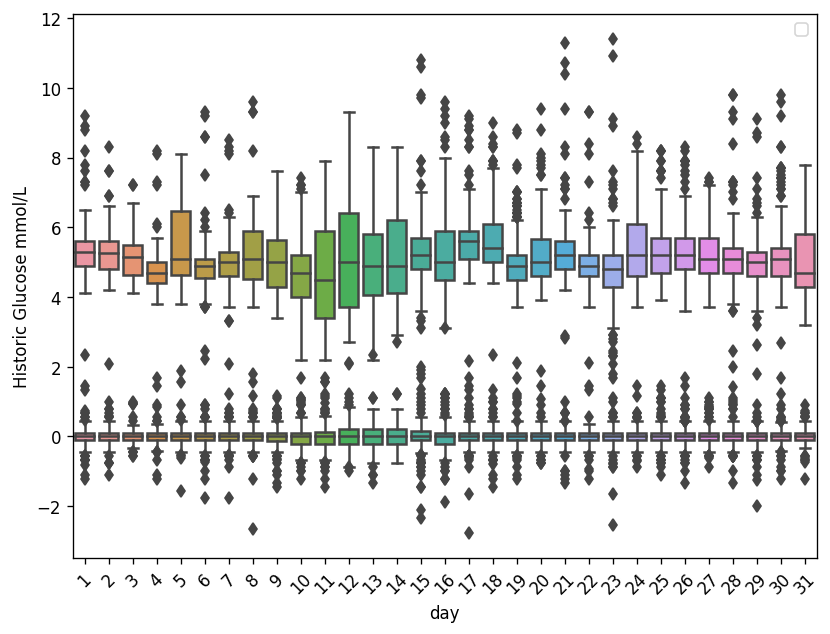

In [429]:
resize()
sns.boxplot(glucose['day'],glucose['dg/dt']*1000)
sns.boxplot(glucose['day'],glucose[glbl])
end_plot()

/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ismail/RestInGit/glyco/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

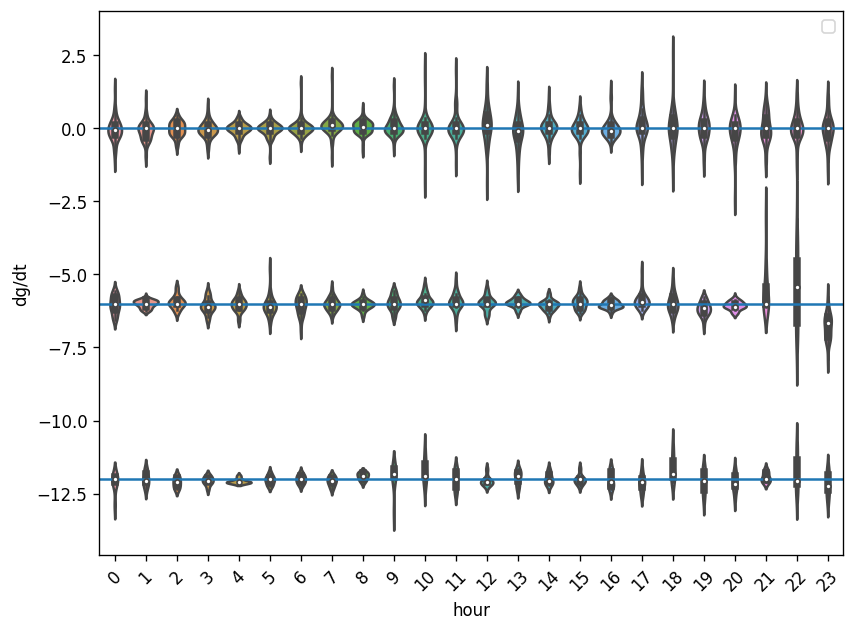

In [443]:
resize()
sns.violinplot(glucose['hour'],glucose['dg/dt']*1000)
DGG=glucosei.loc['2020-05-16':'2020-05-22']
sns.violinplot(DGG['hour'],DGG['dg/dt']*1000-6)
DGG=glucosei.loc['2020-05-24':'2020-05-25']
sns.violinplot(DGG['hour'],DGG['dg/dt']*1000-12)
#sns.boxplot(glucose['hour'],glucose[glbl])
plt.axhline(y=0)
plt.axhline(y=-6)
plt.axhline(y=-12)
end_plot()

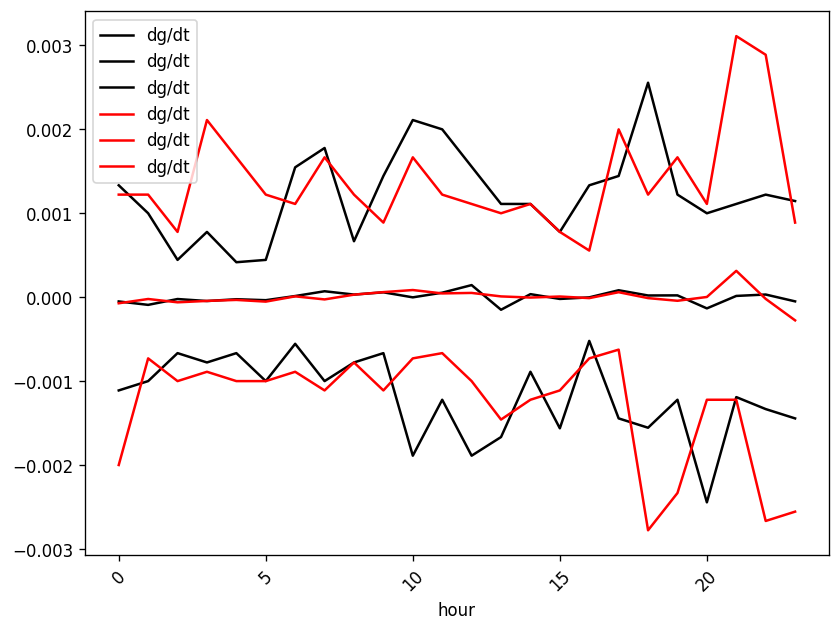

In [497]:
GB = glucose.groupby(['hour'])
resize()
l=dglbl
GB[l].max().plot(color='black')
GB[l].min().plot(color='black')
GB[l].mean().plot(color='black')

GB = glucosei.groupby(['hour'])

GB[l].max().plot(color='red')
GB[l].min().plot(color='red')
GB[l].mean().plot(color='red')

end_plot()

No handles with labels found to put in legend.


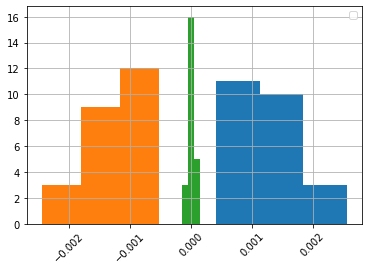

No handles with labels found to put in legend.


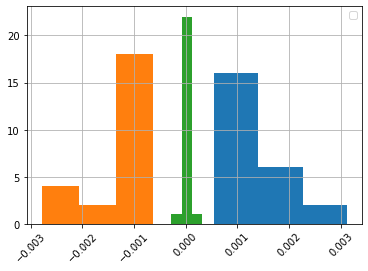

In [503]:
GB = glucose.groupby(['hour'])

l=dglbl
GB[l].max().hist(bins=3)
GB[l].min().hist(bins=3)
GB[l].mean().hist(bins=3)
end_plot()
GB = glucosei.groupby(['hour'])

GB[l].max().hist(bins=3)
GB[l].min().hist(bins=3)
GB[l].mean().hist(bins=3)

end_plot()

-1.2144122277435985

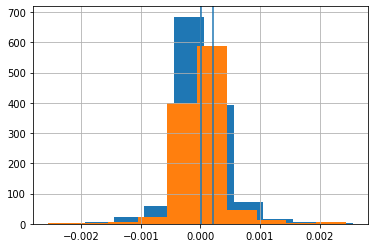

In [525]:


glucose[dglbl].hist()

glucosei.loc['2020-05-22':][dglbl].hist()
plt.axvline(x=glucose[dglbl].mean()+glucose[dglbl].std()/2)
plt.axvline(x=glucosei.loc['2020-05-22':][dglbl].mean())

glucosei.loc['2020-05-16':'2020-05-24'][dglbl].mean()/glucose[dglbl].mean()

In [526]:
LIMITU = glucose[dglbl].mean()+glucose[dglbl].std()
LIMITD = glucose[dglbl].mean()-glucose[dglbl].std()
glucose['UP'] = glucose[dglbl].map(lambda x:x>=LIMITU)
glucose['DOWN'] = glucose[dglbl].map(lambda x:x<=LIMITD)

<AxesSubplot:xlabel='dtime'>

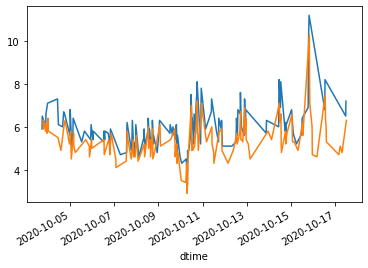

In [529]:
glucose[glucose['UP']][glbl].plot()
glucose[glucose['DOWN']][glbl].plot()

In [ ]:
GB[l].max()

In [458]:
GB.mean()



,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),Carbohydrates (servings),Non-numeric Long-Acting Insulin,Long-Acting Insulin Value (units),...,Ketone mmol/L,Meal Insulin (units),Correction Insulin (units),User Change Insulin (units),day,dayofweek,minute,tminutes,ftime,dg/dt
hour,,,,,,,,,,,,,,,,,,,,,
0,0.733108,5.284925,5.449315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.375000,3.229730,28.682432,28.682432,28.682432,-0.000072
1,0.509091,5.116667,5.372500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.931818,3.036364,29.968182,89.968182,129.968182,-0.000022
2,0.032407,4.918182,5.585714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.787037,2.671296,29.888889,149.888889,229.888889,-0.000061
3,0.011952,4.771371,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.725100,2.908367,30.235060,210.235060,330.235060,-0.000044
4,0.000000,4.651331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.422053,3.034221,29.878327,269.878327,429.878327,-0.000033
5,0.003717,4.492164,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.643123,2.996283,29.866171,329.866171,529.866171,-0.000053
6,0.116364,4.437313,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.854545,3.000000,29.232727,389.232727,629.232727,0.000010
7,0.000000,4.356180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.591760,3.007491,29.704120,449.704120,729.704120,-0.000027
8,0.099644,4.422388,4.690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.779359,2.996441,29.622776,509.622776,829.622776,0.000030
